In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
without_glass=cv2.imread("image_01.png")
with_glass=cv2.imread("image_02.png")
group_image=cv2.imread("image_03.png")

In [3]:
without_glass_1=cv2.cvtColor(without_glass,cv2.COLOR_BGR2GRAY)
with_glass_1=cv2.cvtColor(with_glass,cv2.COLOR_BGR2GRAY)
group_image_1=cv2.cvtColor(group_image,cv2.COLOR_BGR2GRAY)

In [4]:
without_glass=cv2.resize(without_glass_1,(600,600))
with_glass=cv2.resize(with_glass_1,(600,600))
group_image=cv2.resize(group_image_1,(600,600))

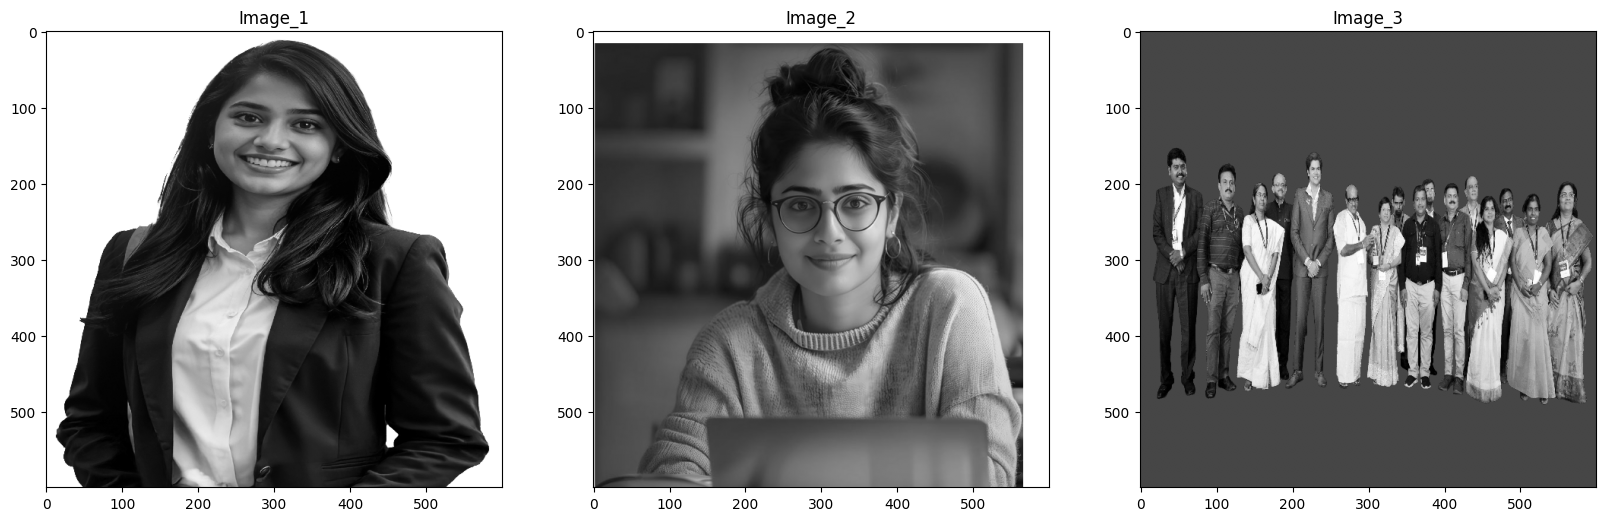

In [5]:
plt.figure(figsize=(20,12))
plt.subplot(131);plt.imshow(without_glass,cmap='gray');plt.title("Image_1")
plt.subplot(132);plt.imshow(with_glass,cmap='gray');plt.title("Image_2")
plt.subplot(133);plt.imshow(group_image,cmap='gray');plt.title("Image_3");
plt.show()

## Cascade Files
##### OpenCv comes with these pre-trained cascade files


## Face Detection

In [6]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [7]:
def detect_face(img):
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img)
    for (x,y,w,h) in face_rects:
        cv2.rectangle(face_img, (x,y),(x+w,y+h),(127,0,255),10)
    return face_img

In [8]:
image_1=cv2.imread('image_01.png',cv2.IMREAD_GRAYSCALE)
image_2=cv2.imread('image_02.png',cv2.IMREAD_GRAYSCALE)
image_3=cv2.imread('image_03.png',cv2.IMREAD_GRAYSCALE)

In [9]:
result_1 = detect_face(image_1)
result_2 = detect_face(image_2)
result_3 = detect_face(image_3)


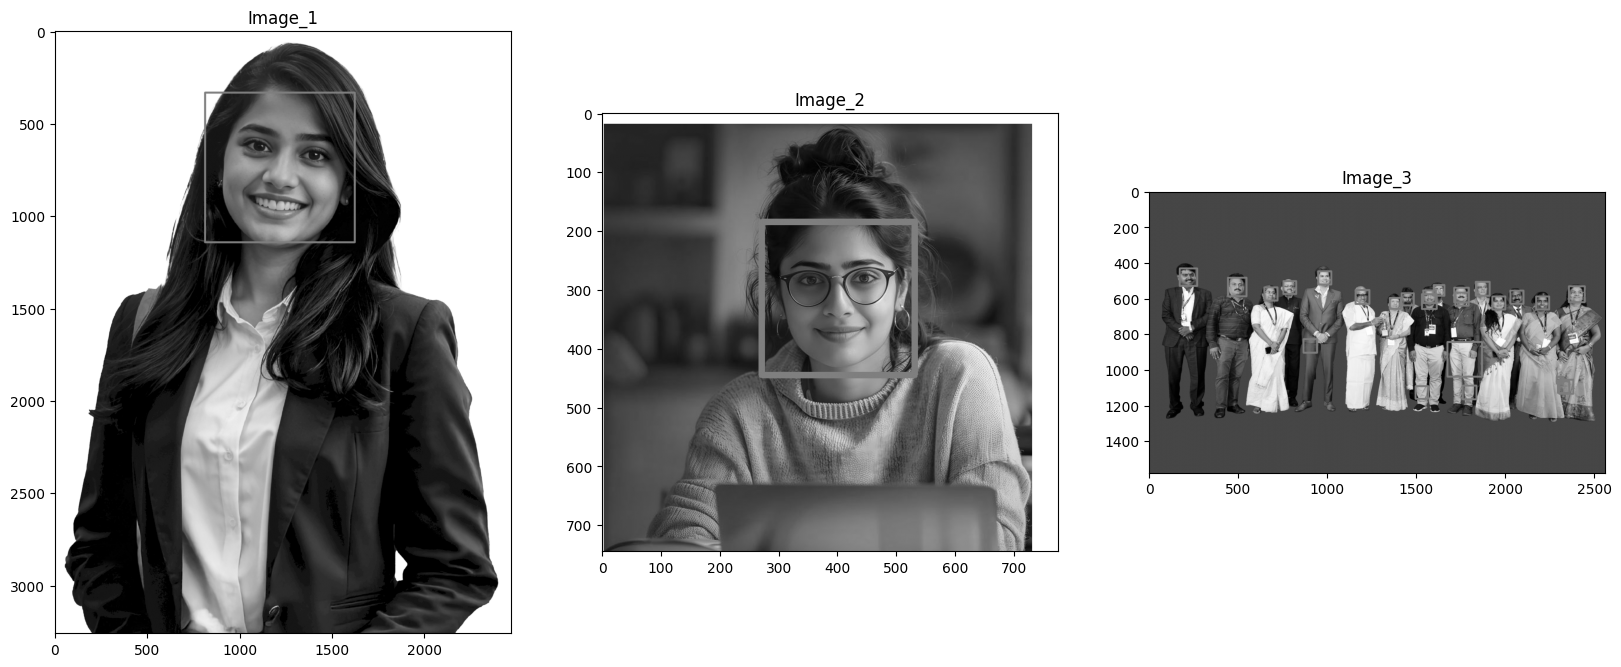

In [10]:
plt.figure(figsize=(20,12))
plt.subplot(131);plt.imshow(result_1,cmap='gray');plt.title("Image_1")
plt.subplot(132);plt.imshow(result_2,cmap='gray');plt.title("Image_2")
plt.subplot(133);plt.imshow(result_3,cmap='gray');plt.title("Image_3");
plt.show()

In [11]:
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')

In [12]:
def detect_eye(image):
    face_img = image.copy()
    eyes = eye_cascade.detectMultiScale(face_img)
    for (x,y,w,h) in eyes:
        cv2.rectangle(face_img,(x,y), (x+w,y+h),(255,255,255),10)
    return face_img

In [13]:
res_1 = detect_eye(image_1)
res_2 = detect_eye(image_2)
res_3 = detect_eye(image_3)


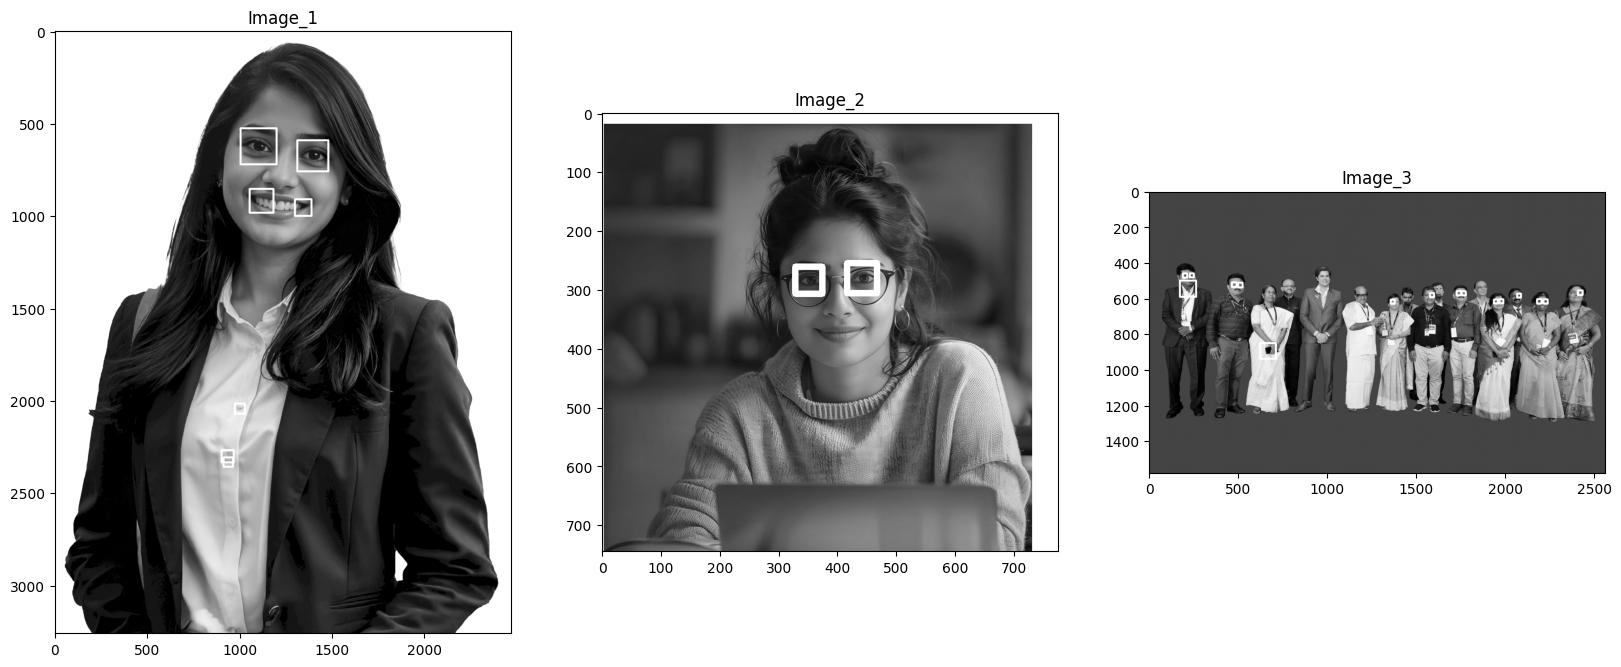

In [14]:
plt.figure(figsize=(20,12))
plt.subplot(131);plt.imshow(res_1,cmap='gray');plt.title("Image_1")
plt.subplot(132);plt.imshow(res_2,cmap='gray');plt.title("Image_2")
plt.subplot(133);plt.imshow(res_3,cmap='gray');plt.title("Image_3");
plt.show()

In [17]:
def new_detect(gray, frame):
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 2)
        roi_gray = gray[y:y + h, x:x + w]
        roi_color = frame[y:y + h, x:x + w]
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex + ew, ey + eh), (0, 255, 0), 2)
    return frame

# Open webcam
video_capture = cv2.VideoCapture(0)

while True:
    ret, frame = video_capture.read()
    if not ret:
        break

    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    canvas = new_detect(gray, frame)

    cv2.imshow('Video', canvas)

    key = cv2.waitKey(1) & 0xFF

    # Save frame when 's' is pressed
    if key == ord('s'):
        cv2.imwrite("face_detection.png", canvas)
        print("✅ Frame saved as face_detection.png")

    # Quit when 'q' is pressed
    elif key == ord('q'):
        break

video_capture.release()
cv2.destroyAllWindows()

✅ Frame saved as face_detection.png
✅ Frame saved as face_detection.png


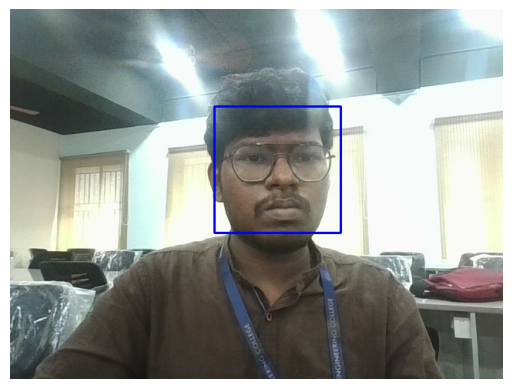

In [18]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img = mpimg.imread('face_detection.png')
plt.imshow(img)
plt.axis('off')
plt.show()